<a href="https://colab.research.google.com/github/warunsrk/Capstone_RetailSales_ABADS_B11/blob/Warun/Retail_Sale_WarunKumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Numpy and Pandas library

import numpy as np
import pandas as pd

# Importing json to read json file

import json

# Importing seaborn and matplotlib library for Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# Importing stats and chi2_contingency for statistical computation

from scipy import stats
from scipy.stats import chi2_contingency

In [3]:
# Importing 'demographics.txt' data set for the case study

demography = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/demographics.txt', sep="\t")

In [4]:
# Importing 'behaviour.JSON' data set for the case study

# Defining the file path
file_path_behaviour = '/content/drive/MyDrive/Colab Notebooks/behaviour.json'

# Opening and reading the behaviour.JSON file
with open(file_path_behaviour, 'r', encoding='utf-8') as file:
    behaviour_json = json.load(file)

# Normalizing JSON data to a DataFrame
# Since the JSON data has keys for each ID, we need to flatten it correctly
data = []
for entry in behaviour_json:
    for key, value in entry.items():
        value['ID'] = key
        data.append(value)

behaviour = pd.DataFrame(data)

In [5]:
# Importing 'campaign.JSON' data set for the case study

# Defining the file path
file_path_campaign = '/content/drive/MyDrive/Colab Notebooks/campaign.json'

# Opening and reading the campaign.JSON file
with open(file_path_campaign, 'r', encoding='utf-8') as file:
    campaign_json = json.load(file)

# Normalizing JSON data to a DataFrame
# Since the JSON data has keys for each ID, we will flatten it correctly
data = []
for entry in campaign_json:
    for key, value in entry.items():
        value['ID'] = key
        data.append(value)

campaign = pd.DataFrame(data)

In [6]:
# Checking the shape of each file

print("Shape of Demography:", demography.shape)
print("Shape of Behaviour:", behaviour.shape)
print("Shape of Campaign:", campaign.shape)

Shape of Demography: (2240, 9)
Shape of Behaviour: (2240, 13)
Shape of Campaign: (2240, 8)


# Data Quality and Check (Task 1)
**1. Creating a consolidated view of data by joining the data present in Demography, behaviour, campaign**

In [7]:
# Converting IDs in behaviour and campaign to match demography IDs
behaviour['ID'] = behaviour['ID'].apply(lambda x: int(x.split('_')[1]))
campaign['ID'] = campaign['ID'].apply(lambda x: int(x.split('_')[1]))

# Merging the DataFrames

sale = demography.merge(behaviour, on='ID').merge(campaign, on='ID')

sale.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0


**2. Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed?**

In [8]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Country              2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

**Observation & further steps:**

-  Need to clean the extra space from the column names.
-  Convert 'Income' datatype to numeric.
-  Convert 'Dt_Customer' datatype to datetime.
-  Change the column name of 'Response' to 'AcceptedCmp6'.
-  Check for missing value and replace with appropriate data.
-  Check for data inconsistancies of the categorical value.
-  Check for null values in the data set.

In [9]:
# Cleaning extra spaces from the column names.

sale.columns = sale.columns.str.strip()

# Converting 'Income' into numeric
sale['Income'] = sale['Income'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Dt_Customer' to datetime
sale['Dt_Customer'] = pd.to_datetime(sale['Dt_Customer'], format='%m/%d/%y')

# Changing the 'Response' column name to 'AcceptedCmp6'
sale.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)


In [10]:
# Identifying the missing values

missing_values = sale.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

Missing values before cleaning:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp6            0
Complain                0
dtype: int64


In [11]:
# Handling the missing value in Income with mean

# 1. Calculate the mean of the 'Income' column
mean_income = sale['Income'].mean()
print(f"Mean of Income: {mean_income}")

# 2. Filling missing values in the 'Income' column with the mean
sale['Income'] = sale['Income'].fillna(mean_income)

# Displaying missing values after filling
print("Missing values after filling:\n", sale.isnull().sum())

Mean of Income: 52247.25135379061
Missing values after filling:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp6           0
Complain               0
dtype: int64


In [12]:
# Checking for inconsistencies in categorical variables

categorical_vars = [
    'Education', 'Marital_Status', 'Country',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp6', 'Complain'
]

categorical_inconsistencies = {}
for var in categorical_vars:
    categorical_inconsistencies[var] = sale[var].unique()

# Summary of Data Validation
validation_summary = {
    #'Data Types': data_types,
    #'Missing Values (%)': missing_values,
    'Categorical Inconsistencies': categorical_inconsistencies,
    #'Outliers': outliers
}

# Displaying the validation summary
for key, value in validation_summary.items():
    print(f"---- {key} ----")
    print(value)
    print("\n")

---- Categorical Inconsistencies ----
{'Education': array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object), 'Marital_Status': array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object), 'Country': array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object), 'AcceptedCmp1': array([0, 1]), 'AcceptedCmp2': array([0, 1]), 'AcceptedCmp3': array([0, 1]), 'AcceptedCmp4': array([0, 1]), 'AcceptedCmp5': array([0, 1]), 'AcceptedCmp6': array([1, 0]), 'Complain': array([0, 1])}




In [13]:
# Check for null values in the data set.

# Check for null values
null_values = sale.isnull().sum()

print(null_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp6           0
Complain               0
dtype: int64


**3. Create a data quality report after doing the necessary cleaning and joining of the files by:<br>
<br>
(a) Doing univariates for continuous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)**

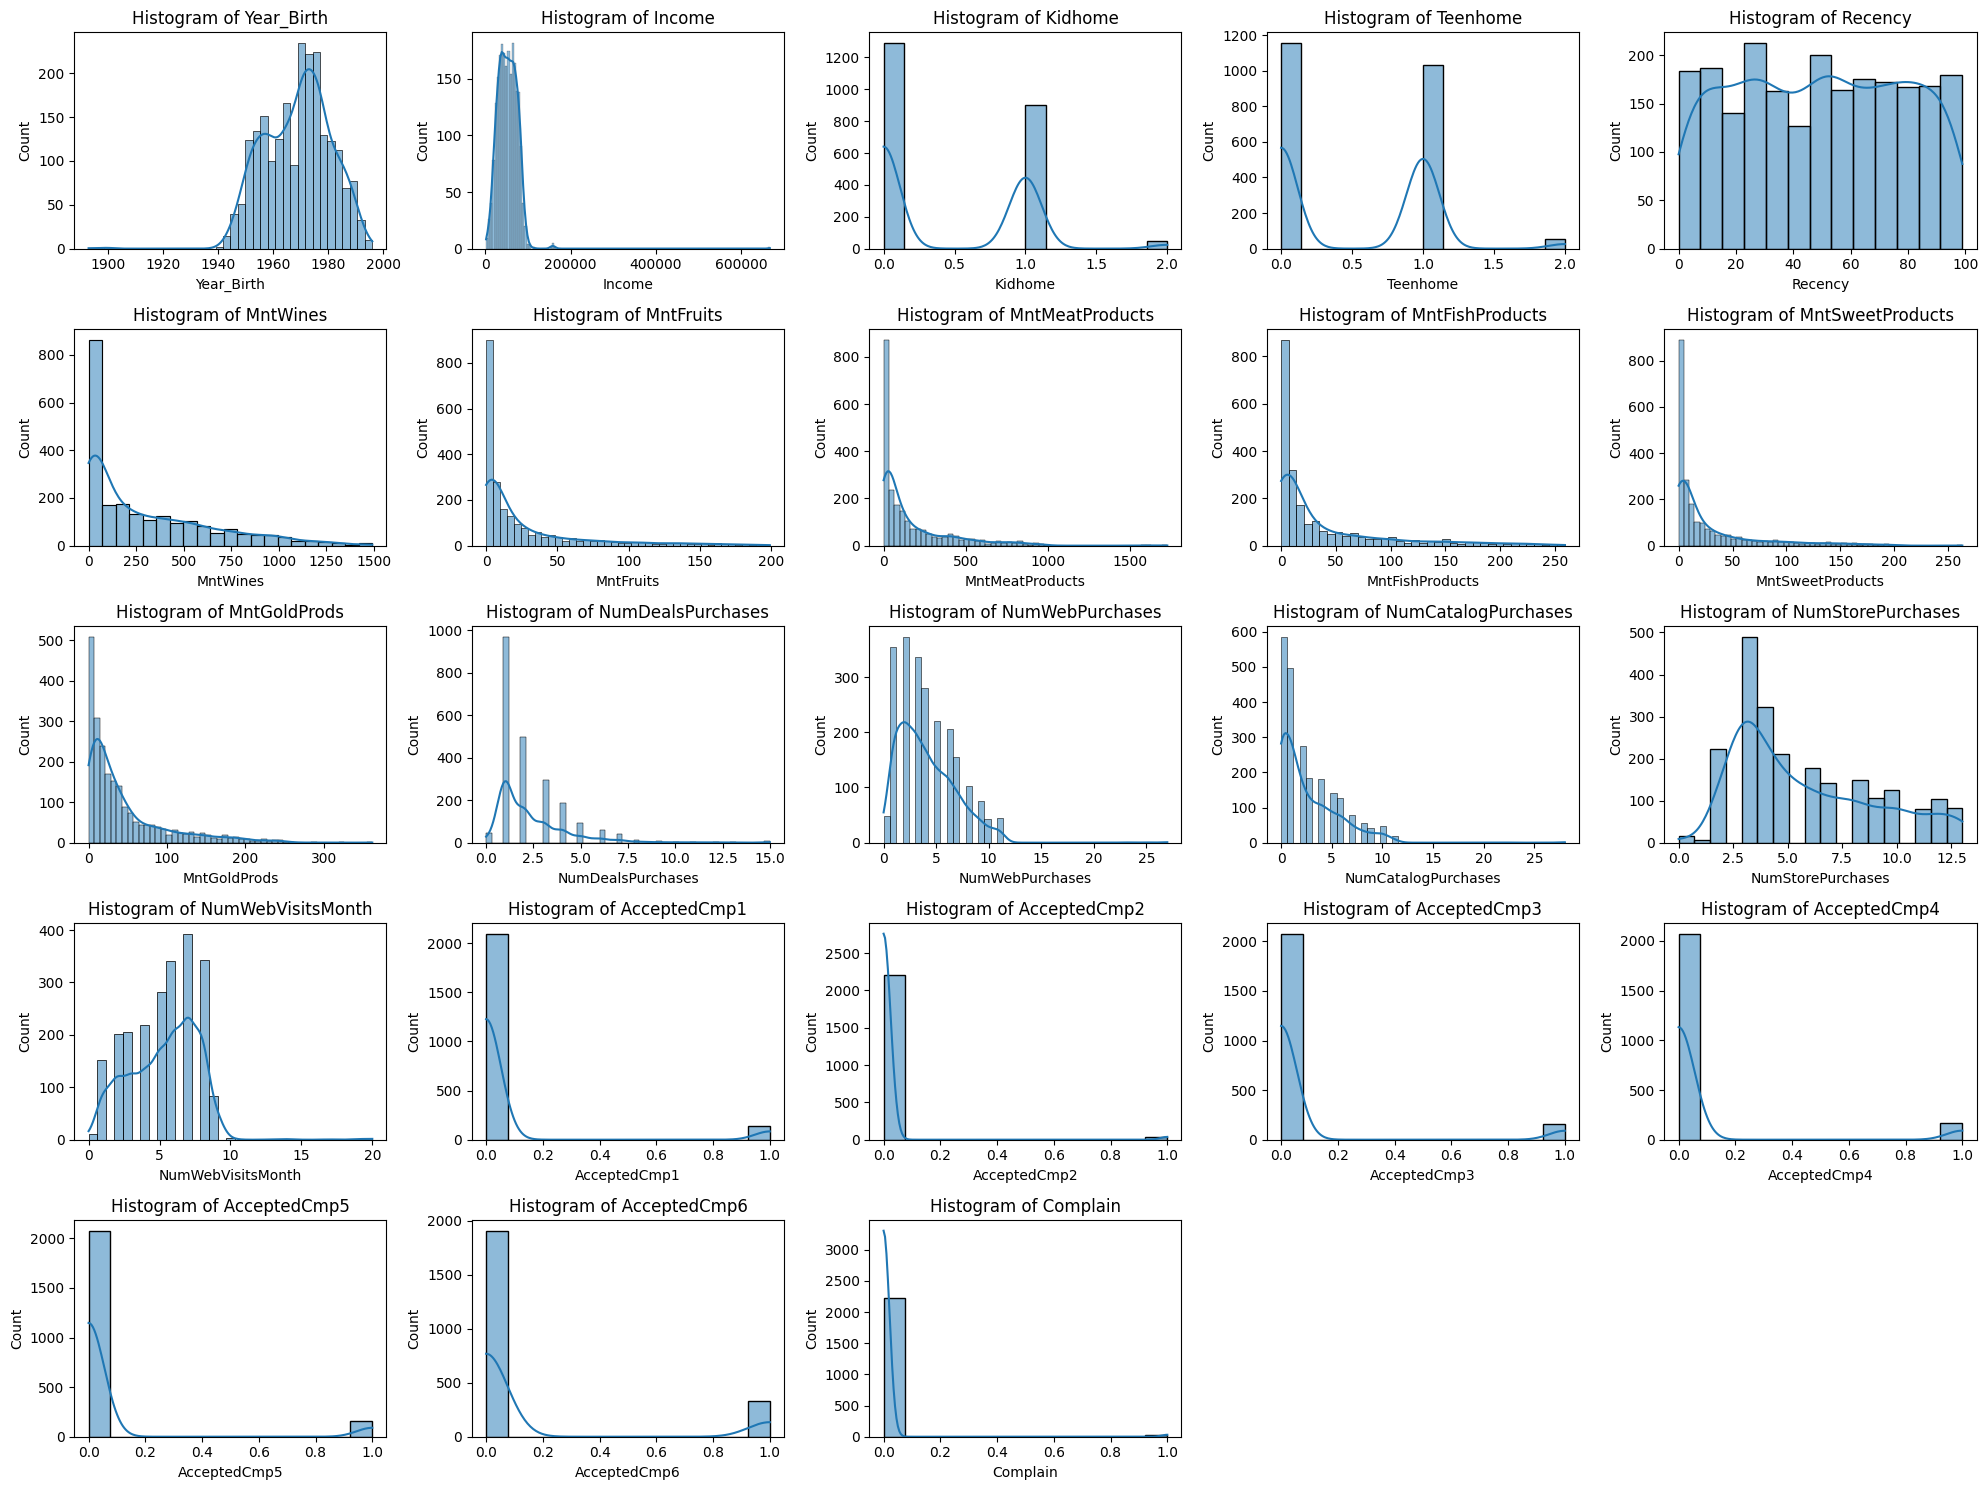

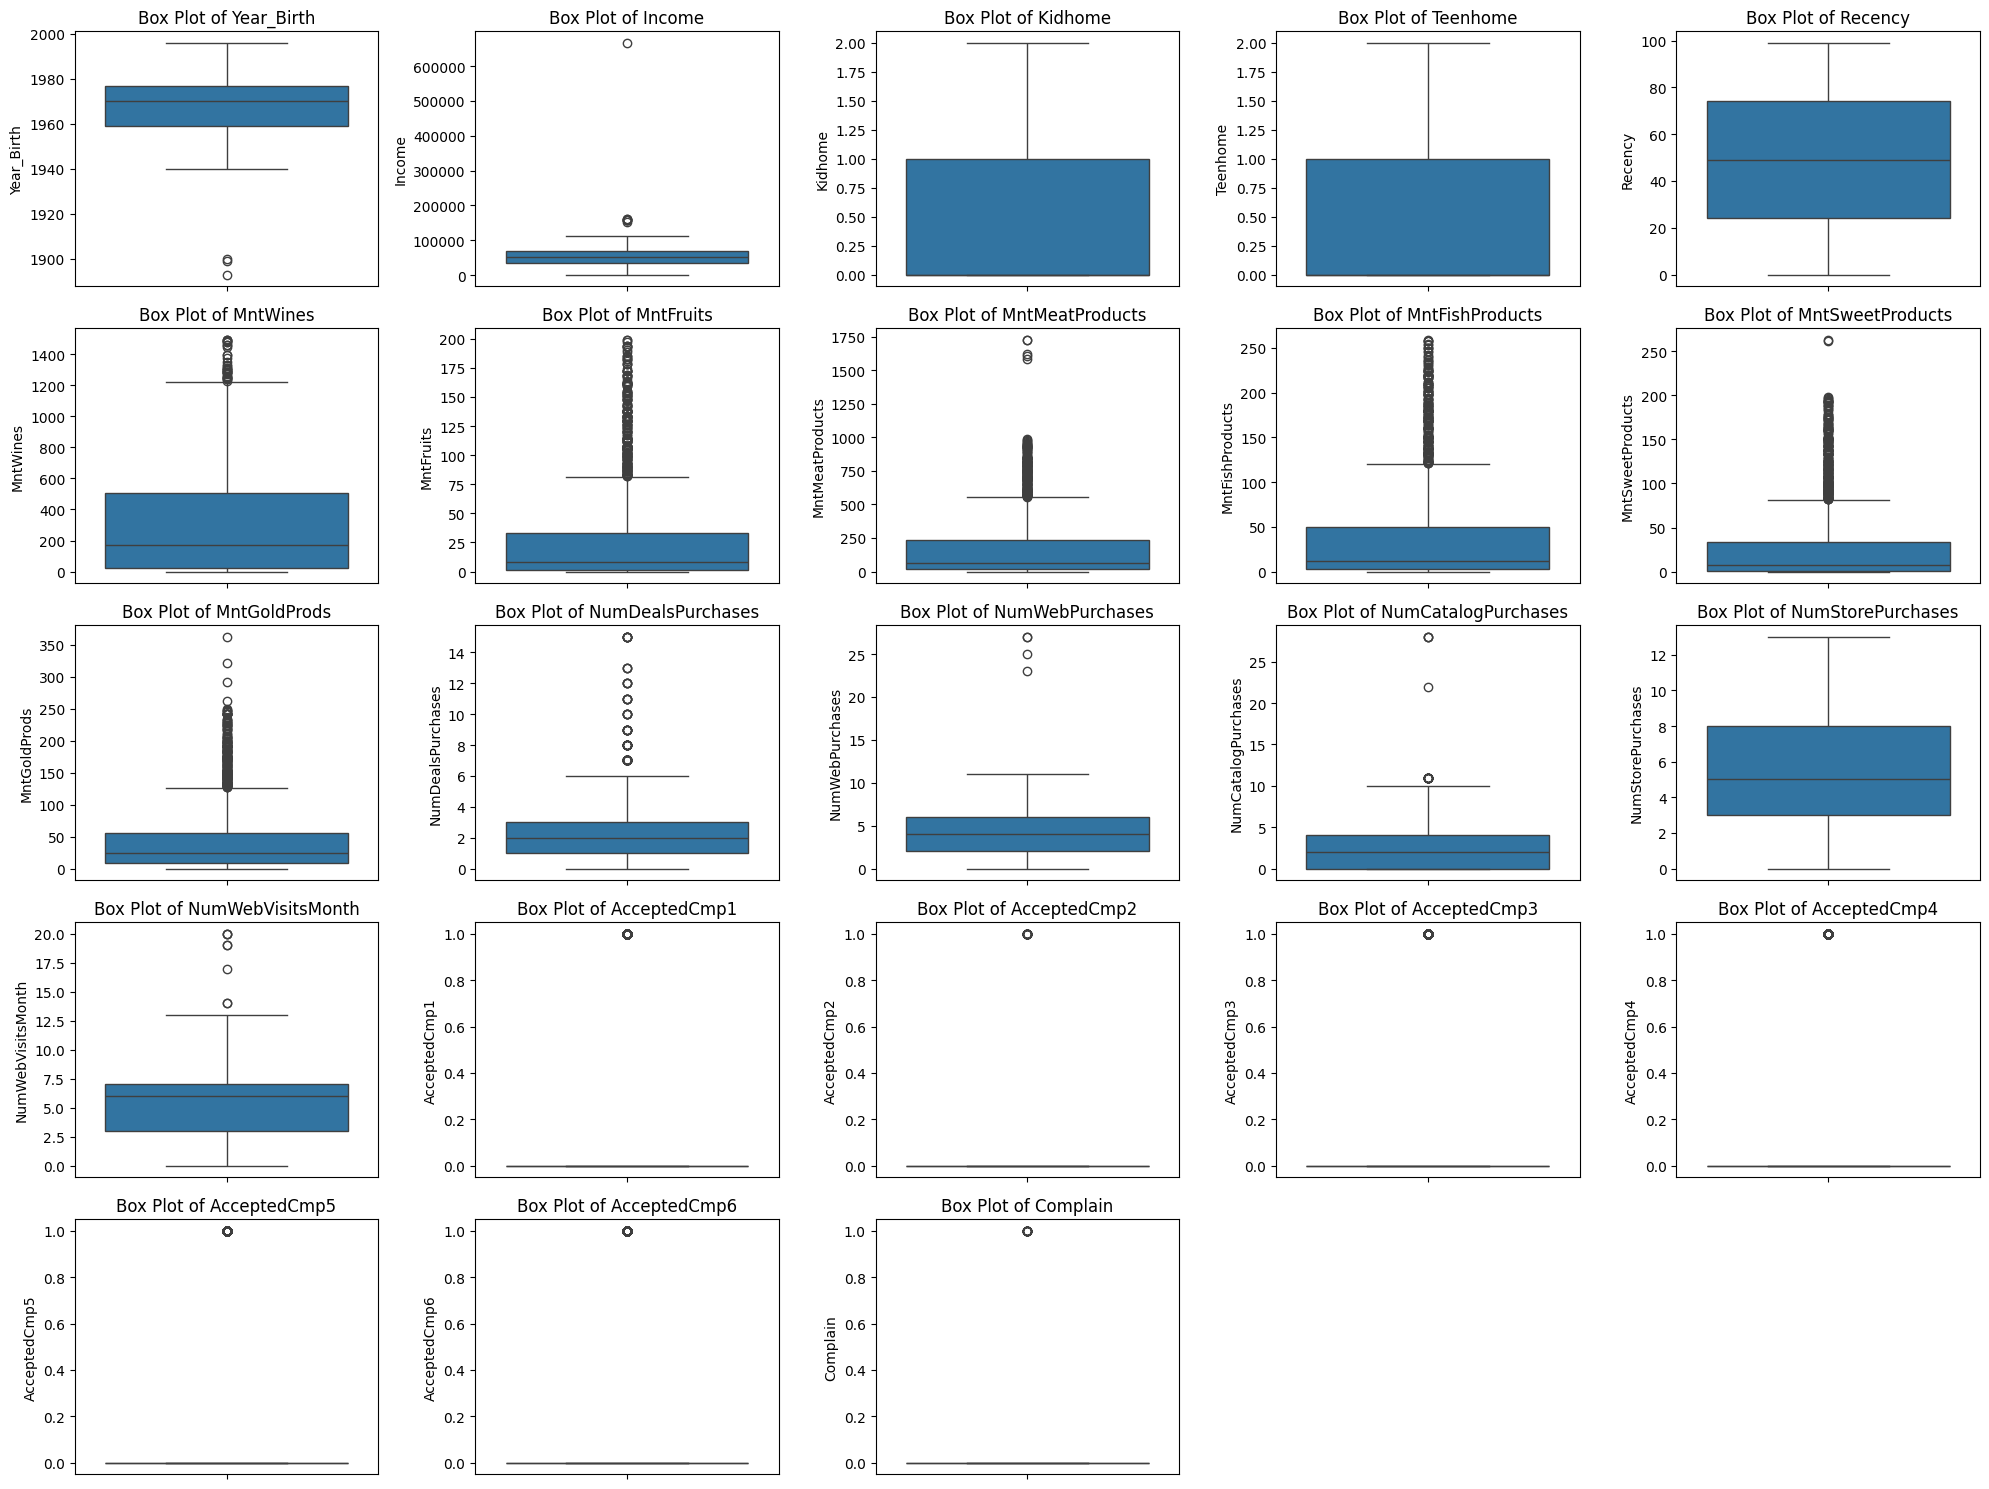

                     Missing Values (%)  Zero Values (%)          Mean  \
Year_Birth                          0.0         0.000000   1968.805804   
Income                              0.0         0.000000  52247.251354   
Kidhome                             0.0        57.723214      0.444196   
Teenhome                            0.0        51.696429      0.506250   
Recency                             0.0         1.250000     49.109375   
MntWines                            0.0         0.580357    303.935714   
MntFruits                           0.0        17.857143     26.302232   
MntMeatProducts                     0.0         0.044643    166.950000   
MntFishProducts                     0.0        17.142857     37.525446   
MntSweetProducts                    0.0        18.705357     27.062946   
MntGoldProds                        0.0         2.723214     44.021875   
NumDealsPurchases                   0.0         2.053571      2.325000   
NumWebPurchases                     0.

In [14]:
# Univariate Analysis for Continuous Variables
continuous_vars = sale.select_dtypes(include=[np.number]).columns.tolist()
continuous_vars.remove('ID')  # Exclude the 'ID' variable.

# Plot histograms for numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(5, 5, i + 1)
    sns.histplot(sale[var], kde=True)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

# Box plots for continuous variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=sale[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

# Initializing an empty dictionary to store results
data_quality_report = {}

# Calculating statistics for each continuous variable
for var in continuous_vars:
    data_quality_report[var] = {
        'Missing Values (%)': sale[var].isnull().mean() * 100,
        'Zero Values (%)': (sale[var] == 0).mean() * 100,
        'Mean': sale[var].mean(),
        '25th Percentile': sale[var].quantile(0.25),
        '50th Percentile (Median)': sale[var].median(),
        '75th Percentile': sale[var].quantile(0.75),
        '90th Percentile': sale[var].quantile(0.90),
        '95th Percentile': sale[var].quantile(0.95),
        'Min': sale[var].min(),
        'Max': sale[var].max()
    }

# Converting the dictionary to a DataFrame
data_quality_report_df = pd.DataFrame(data_quality_report).transpose()

# Displaying the data quality report
print(data_quality_report_df)

**3. Create a data quality report after doing the necessary cleaning and joining of the files by:<br>
(b) Doing univariates for categorical variables (compute:percentage of missing values, number of unique values)**

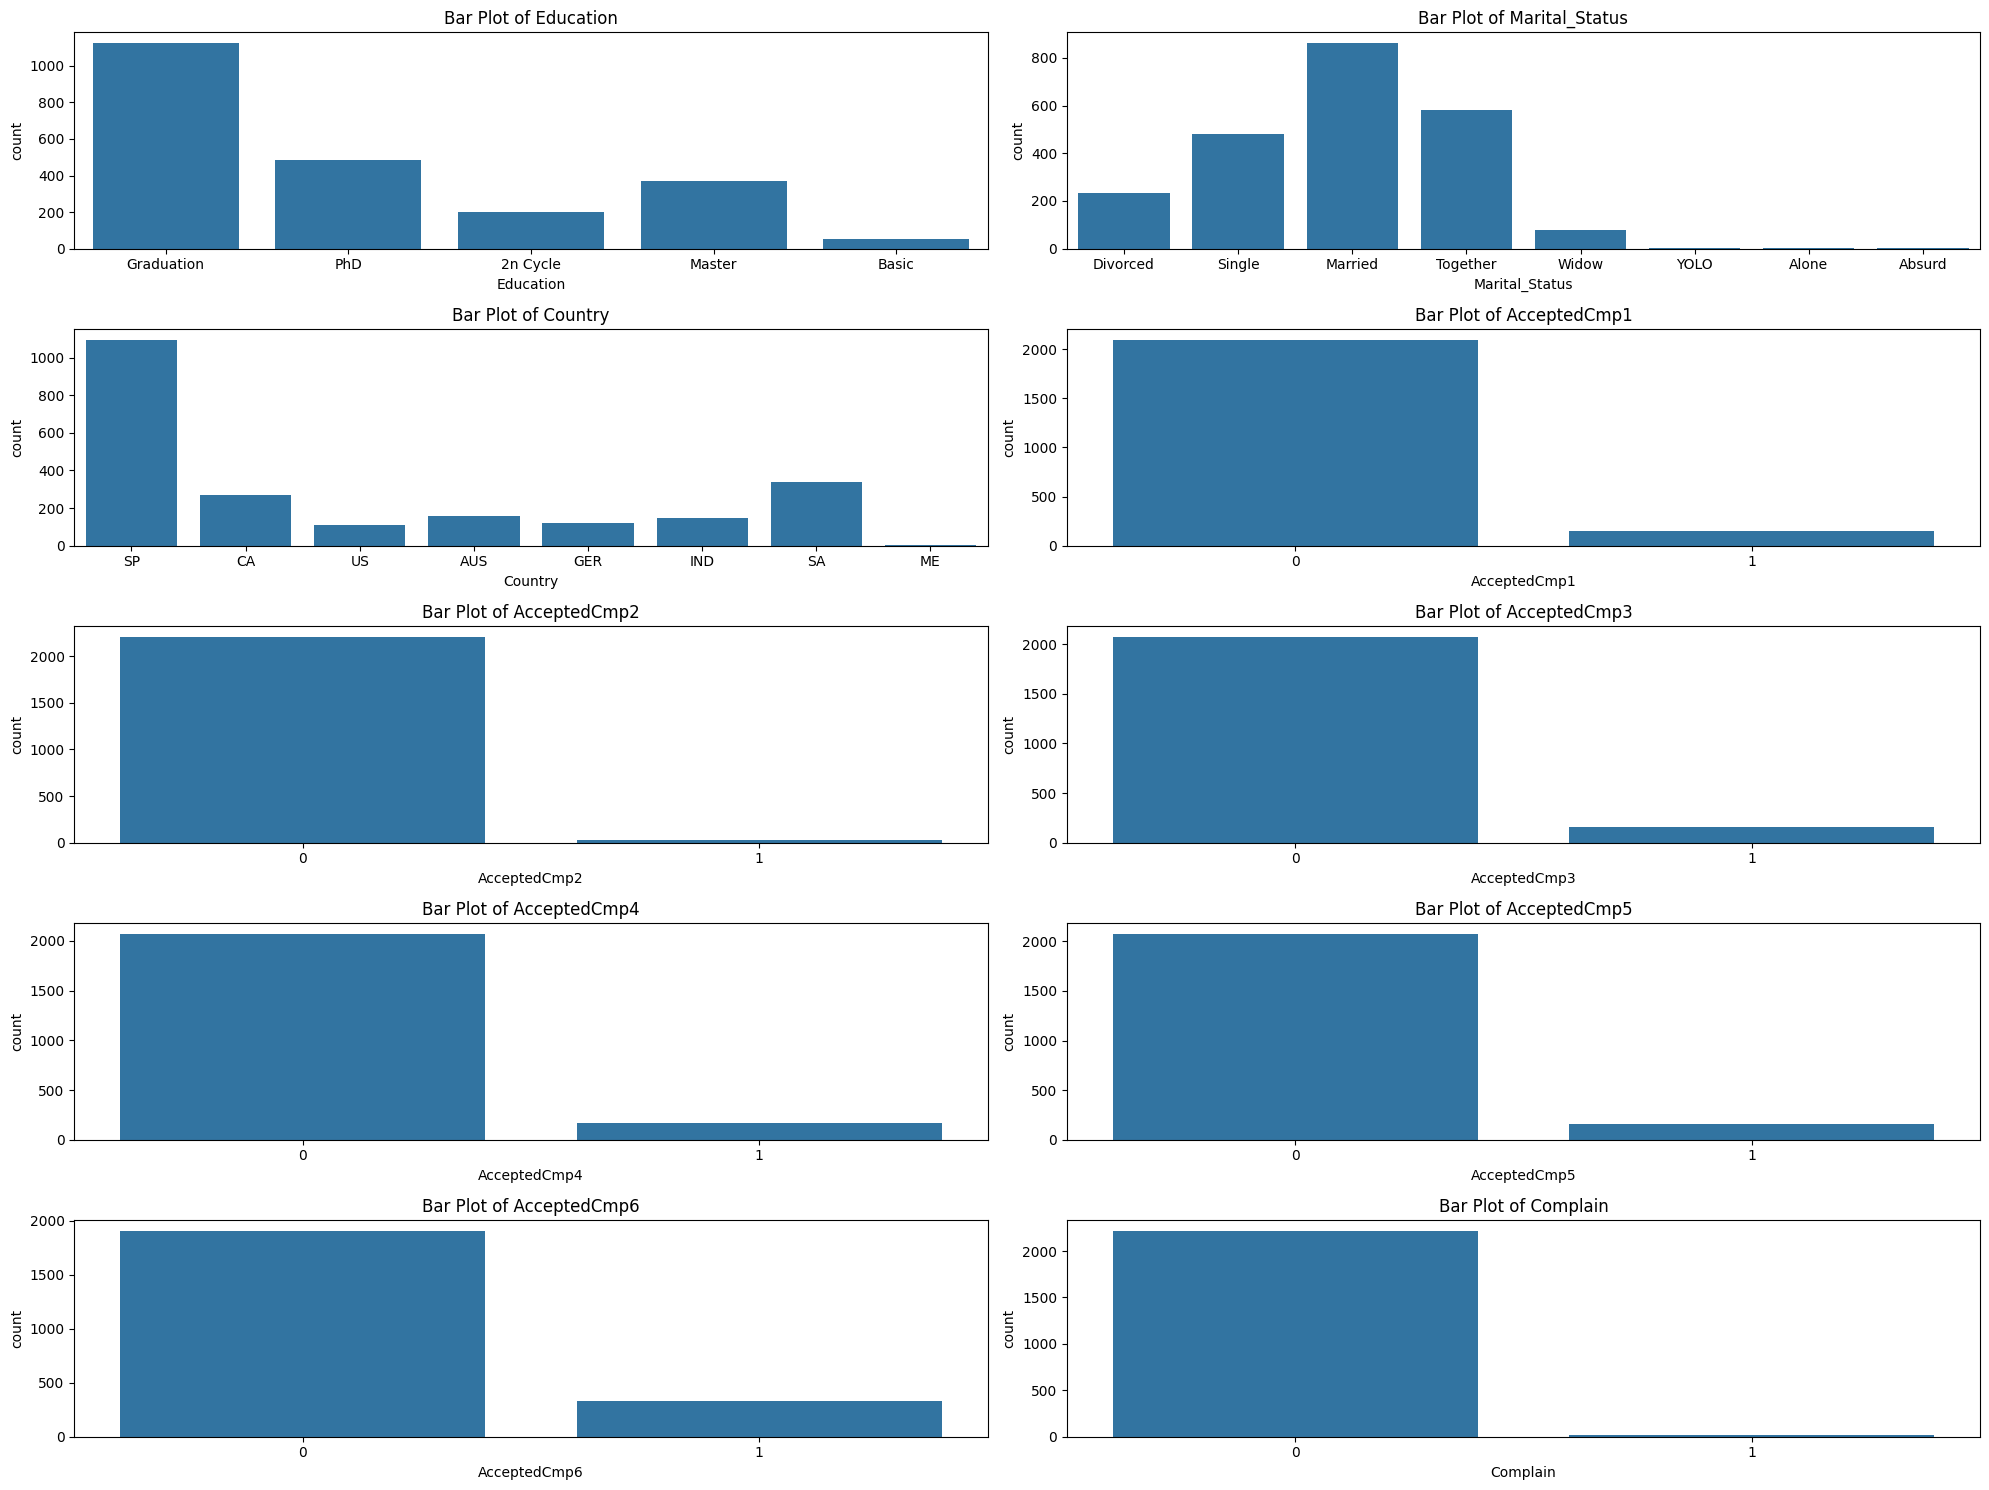

                Missing Values (%)  Unique Values
Education                      0.0            5.0
Marital_Status                 0.0            8.0
Country                        0.0            8.0
AcceptedCmp1                   0.0            2.0
AcceptedCmp2                   0.0            2.0
AcceptedCmp3                   0.0            2.0
AcceptedCmp4                   0.0            2.0
AcceptedCmp5                   0.0            2.0
AcceptedCmp6                   0.0            2.0
Complain                       0.0            2.0


In [15]:
# Univariate Analysis for Categorical Variables

# Creating list of categorical variables
categorical_vars = [
    'Education', 'Marital_Status', 'Country',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp6', 'Complain'
]

# Plotting bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 2, i + 1)
    sns.countplot(x=sale[var])
    plt.title(f'Bar Plot of {var}')

plt.tight_layout()
plt.show()

# Initializing an empty dictionary to store results
data_quality_report_categorical = {}

# Calculating statistics for each categorical variable
for var in categorical_vars:
    data_quality_report_categorical[var] = {
        'Missing Values (%)': sale[var].isnull().mean() * 100,
        'Unique Values': sale[var].nunique()
    }

# Converting the dictionary to a DataFrame
data_quality_report_categorical_df = pd.DataFrame(data_quality_report_categorical).transpose()

# Displaying the data quality report for categorical variables
print(data_quality_report_categorical_df)

**4. Are there any extreme values of variables representing income, amount of money spent on various categories, recency of purchase?**

In [16]:
# Creating a list of variables to check for extreme values

variables_of_interest = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Function to identify outliers using IQR method
def find_outliers(sale, column):
    if column not in sale.columns:
        return None

    Q1 = sale[column].quantile(0.25)
    Q3 = sale[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sale[(sale[column] < lower_bound) | (sale[column] > upper_bound)]
    return outliers

# Identifying and printing outliers for each variable of interest
for var in variables_of_interest:
    outliers = find_outliers(sale, var)
    if outliers is not None:
        #print(f"Outliers for {var}:")
        #print(outliers)
        print(f"Number of outliers in {var}: {len(outliers)}")
    else:
        print(f"Column {var} does not exist in the DataFrame.")
    print()

Number of outliers in Income: 8

Number of outliers in Recency: 0

Number of outliers in MntWines: 35

Number of outliers in MntFruits: 227

Number of outliers in MntMeatProducts: 175

Number of outliers in MntFishProducts: 223

Number of outliers in MntSweetProducts: 248

Number of outliers in MntGoldProds: 207



# Business Analysis and Hypothesis (Task 2)
**1. Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns.**

**Step 1: Formulate Hypotheses**<BR>
**Hypothesis 1:** There is a positive correlation between the amount spent on wines (MntWines) and the number of campaigns accepted.<BR>
**Hypothesis 2:** Customers who have accepted at least one campaign spend more on average across all categories compared to those who have not accepted any campaign.

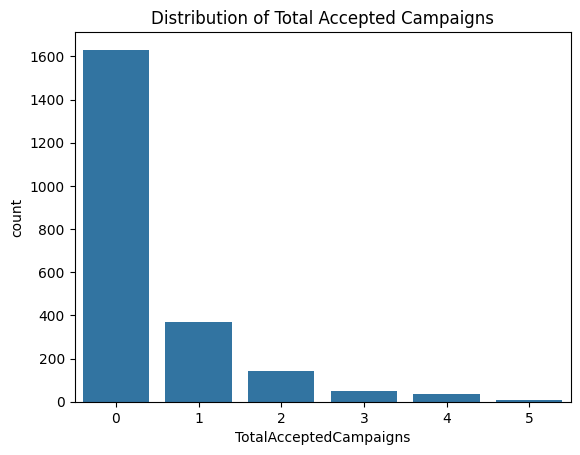

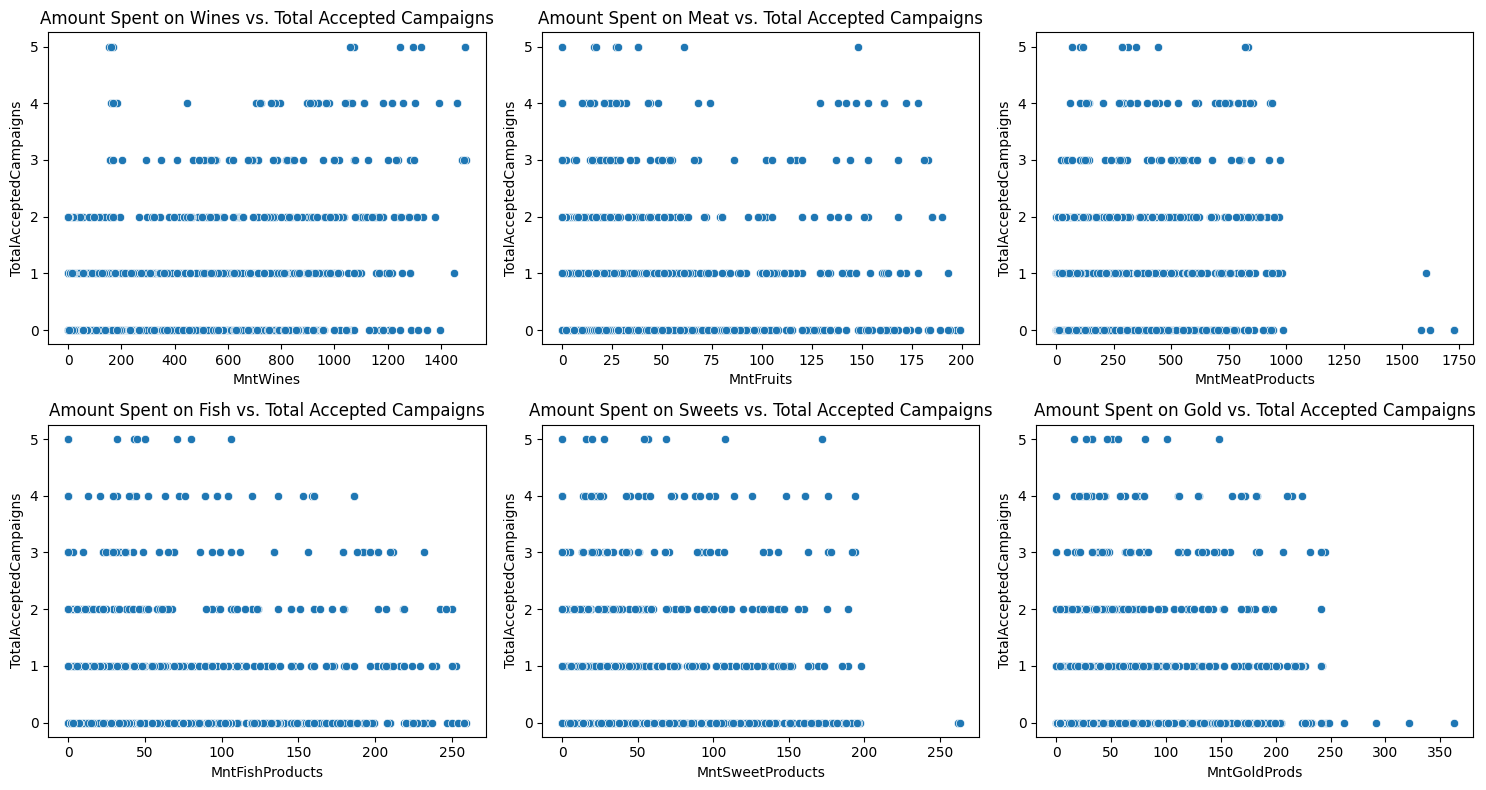

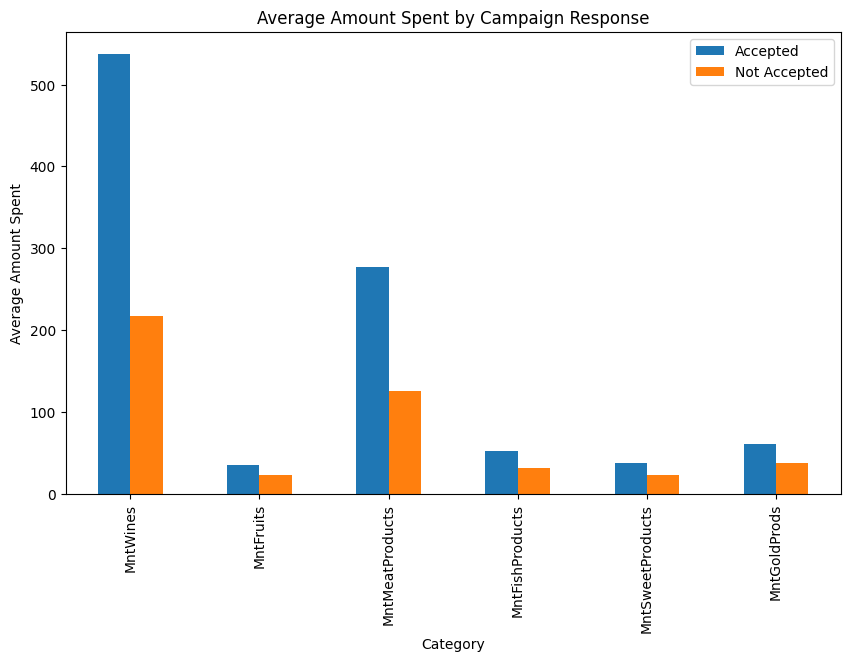

In [17]:
# Creating a new column for the total number of campaigns accepted
sale['TotalAcceptedCampaigns'] = (
    sale['AcceptedCmp1'] + sale['AcceptedCmp2'] +
    sale['AcceptedCmp3'] + sale['AcceptedCmp4'] +
    sale['AcceptedCmp5'] + sale['AcceptedCmp6']
)

# Creating a new column for the total amount spent
sale['TotalMntSpent'] = (
    sale['MntWines'] + sale['MntFruits'] +
    sale['MntMeatProducts'] + sale['MntFishProducts'] +
    sale['MntSweetProducts'] + sale['MntGoldProds']
)

# Plotting the distribution of TotalAcceptedCampaigns
sns.countplot(data=sale, x='TotalAcceptedCampaigns')
plt.title('Distribution of Total Accepted Campaigns')
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plotting the relationship between amount spent on wines and total accepted campaigns
sns.scatterplot(data=sale, x='MntWines', y='TotalAcceptedCampaigns', ax=axes[0, 0])
axes[0, 0].set_title('Amount Spent on Wines vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on fruits and total accepted campaigns
sns.scatterplot(data=sale, x='MntFruits', y='TotalAcceptedCampaigns', ax=axes[0, 1])
axes[0, 1].set_title('Amount Spent on Fruits vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on meat and total accepted campaigns
sns.scatterplot(data=sale, x='MntMeatProducts', y='TotalAcceptedCampaigns', ax=axes[0, 2])
axes[0, 1].set_title('Amount Spent on Meat vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on fish and total accepted campaigns
sns.scatterplot(data=sale, x='MntFishProducts', y='TotalAcceptedCampaigns', ax=axes[1, 0])
axes[1, 0].set_title('Amount Spent on Fish vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on sweets and total accepted campaigns
sns.scatterplot(data=sale, x='MntSweetProducts', y='TotalAcceptedCampaigns', ax=axes[1, 1])
axes[1, 1].set_title('Amount Spent on Sweets vs. Total Accepted Campaigns')

# Plotting the relationship between amount spent on gold and total accepted campaigns
sns.scatterplot(data=sale, x='MntGoldProds', y='TotalAcceptedCampaigns', ax=axes[1, 2])
axes[1, 2].set_title('Amount Spent on Gold vs. Total Accepted Campaigns')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the average amount spent across different categories for customers who accepted at least one campaign vs. those who did not
accepted_df = sale[sale['TotalAcceptedCampaigns'] > 0]
not_accepted_df = sale[sale['TotalAcceptedCampaigns'] == 0]

categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

accepted_avg_spent = accepted_df[categories].mean()
not_accepted_avg_spent = not_accepted_df[categories].mean()

avg_spent_df = pd.DataFrame({
    'Category': categories,
    'Accepted': accepted_avg_spent.values,
    'Not Accepted': not_accepted_avg_spent.values
})

avg_spent_df.plot(kind='bar', x='Category', figsize=(10, 6))
plt.title('Average Amount Spent by Campaign Response')
plt.ylabel('Average Amount Spent')
plt.show()

**Conduct Statistical Tests** <BR>
**Hypothesis 1:** Correlation between Amount Spent on Wines and Campaign Responses

In [18]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(sale['MntWines'], sale['TotalAcceptedCampaigns'])
print(f"Pearson correlation: {correlation}, p-value: {p_value}")

# Check if the correlation is statistically significant
if p_value < 0.05:
    print("There is a statistically significant correlation between the amount spent on wines and the number of campaigns accepted.")
else:
    print("There is no statistically significant correlation between the amount spent on wines and the number of campaigns accepted.")

Pearson correlation: 0.4892112144220273, p-value: 3.9538783211580286e-135
There is a statistically significant correlation between the amount spent on wines and the number of campaigns accepted.


**Hypothesis 2:** Difference in Spending between Campaign Responders and Non-Responders

In [19]:
from scipy.stats import ttest_ind

# Conduct t-tests for each category
for category in categories:
    t_stat, p_val = ttest_ind(accepted_df[category], not_accepted_df[category])
    print(f"{category}: t-statistic = {t_stat}, p-value = {p_val}")

    # Check if the difference is statistically significant
    if p_val < 0.05:
        print(f"There is a statistically significant difference in {category} spending between customers who accepted at least one campaign and those who did not.")
    else:
        print(f"There is no statistically significant difference in {category} spending between customers who accepted at least one campaign and those who did not.")

MntWines: t-statistic = 22.161239760203575, p-value = 1.5223302006807464e-98
There is a statistically significant difference in MntWines spending between customers who accepted at least one campaign and those who did not.
MntFruits: t-statistic = 7.013593424341267, p-value = 3.064616051457418e-12
There is a statistically significant difference in MntFruits spending between customers who accepted at least one campaign and those who did not.
MntMeatProducts: t-statistic = 14.80895318838097, p-value = 2.0865579131510152e-47
There is a statistically significant difference in MntMeatProducts spending between customers who accepted at least one campaign and those who did not.
MntFishProducts: t-statistic = 7.8359529738525975, p-value = 7.131763385696401e-15
There is a statistically significant difference in MntFishProducts spending between customers who accepted at least one campaign and those who did not.
MntSweetProducts: t-statistic = 7.890034237877532, p-value = 4.684517786425751e-15
The

**2. Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc**

     Campaign  Accepted  Percentage
0  Campaign 1       144    6.428571
1  Campaign 2        30    1.339286
2  Campaign 3       163    7.276786
3  Campaign 4       167    7.455357
4  Campaign 5       163    7.276786
5  Campaign 6       334   14.910714


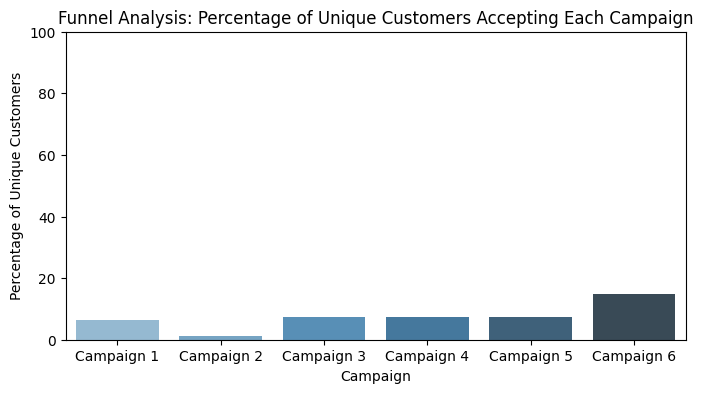

In [20]:
# Step 1: Calculate the total number of unique customers
total_customers = sale['ID'].nunique()

# Step 2: Calculate the number of customers who accepted each campaign
accepted_cmp1 = sale['AcceptedCmp1'].sum()
accepted_cmp2 = sale['AcceptedCmp2'].sum()
accepted_cmp3 = sale['AcceptedCmp3'].sum()
accepted_cmp4 = sale['AcceptedCmp4'].sum()
accepted_cmp5 = sale['AcceptedCmp5'].sum()
accepted_cmp6 = sale['AcceptedCmp6'].sum()

# Step 3: Calculate the percentage of unique customers who accepted each campaign
percentage_cmp1 = (accepted_cmp1 / total_customers) * 100
percentage_cmp2 = (accepted_cmp2 / total_customers) * 100
percentage_cmp3 = (accepted_cmp3 / total_customers) * 100
percentage_cmp4 = (accepted_cmp4 / total_customers) * 100
percentage_cmp5 = (accepted_cmp5 / total_customers) * 100
percentage_cmp6 = (accepted_cmp6 / total_customers) * 100

# Create a DataFrame for the funnel analysis
funnel_data = {
    'Campaign': ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6'],
    'Accepted': [accepted_cmp1, accepted_cmp2, accepted_cmp3, accepted_cmp4, accepted_cmp5, accepted_cmp6],
    'Percentage': [percentage_cmp1, percentage_cmp2, percentage_cmp3, percentage_cmp4, percentage_cmp5, percentage_cmp6]
}
funnel_df = pd.DataFrame(funnel_data)

# Display the funnel DataFrame
print(funnel_df)

# Plotting the funnel analysis

plt.figure(figsize=(8, 4))
sns.barplot(data=funnel_df, x='Campaign', y='Percentage', palette='Blues_d', hue='Campaign', legend=False)
plt.title('Funnel Analysis: Percentage of Unique Customers Accepting Each Campaign')
plt.ylabel('Percentage of Unique Customers')
plt.xlabel('Campaign')
plt.ylim(0, 100)
plt.show()

**3. Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products**

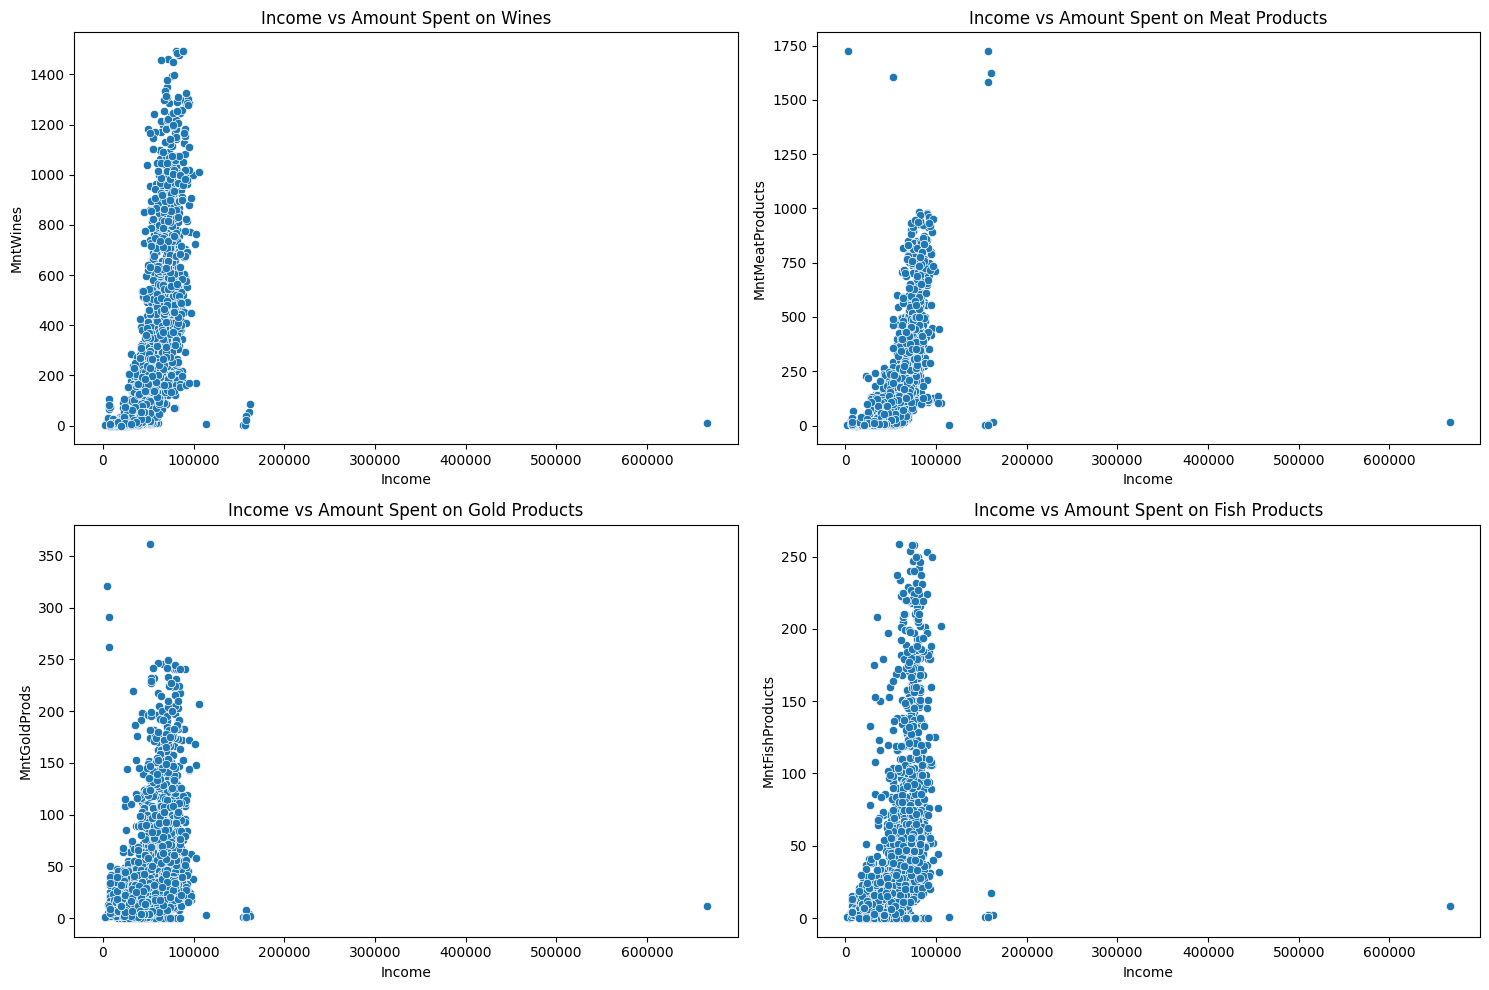

Correlation between Income and MntWines: 0.58
Correlation between Income and MntMeatProducts: 0.58
Correlation between Income and MntGoldProds: 0.32
Correlation between Income and MntFishProducts: 0.44
Regression results for MntWines:
  Intercept: -101.19503564985229
  Slope: 0.007754106473319267
  R-squared: 0.33



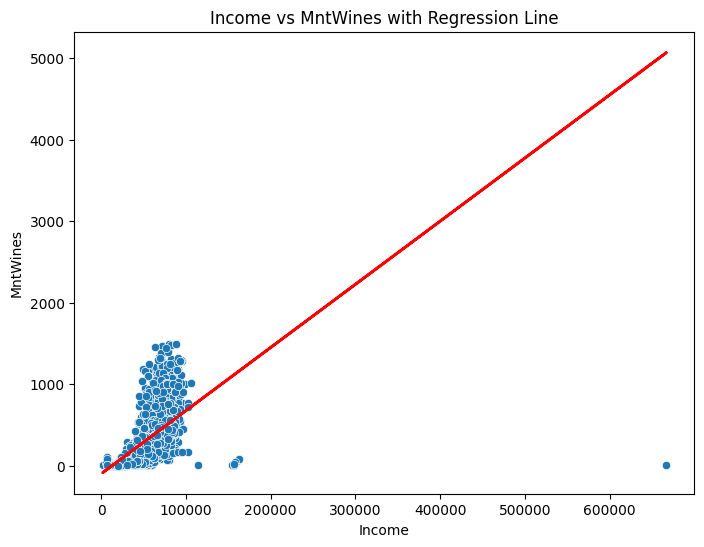

Regression results for MntMeatProducts:
  Intercept: -105.19955275818012
  Slope: 0.005208877897046258
  R-squared: 0.33



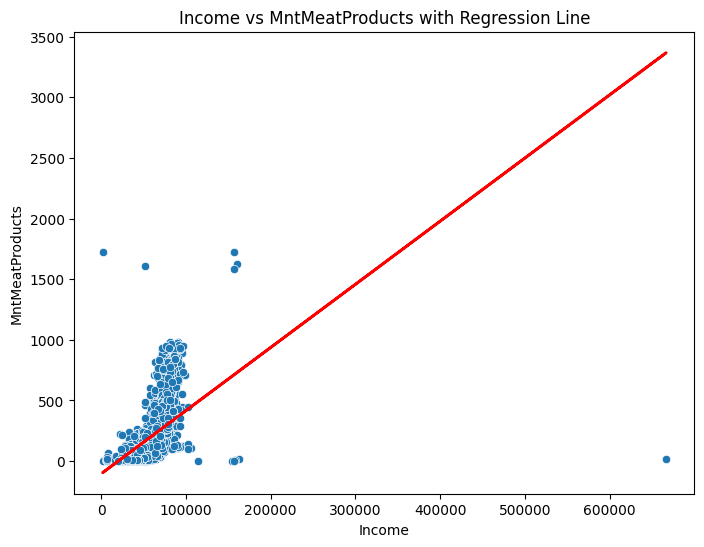

Regression results for MntGoldProds:
  Intercept: 8.971521566643332
  Slope: 0.000670855452203874
  R-squared: 0.10



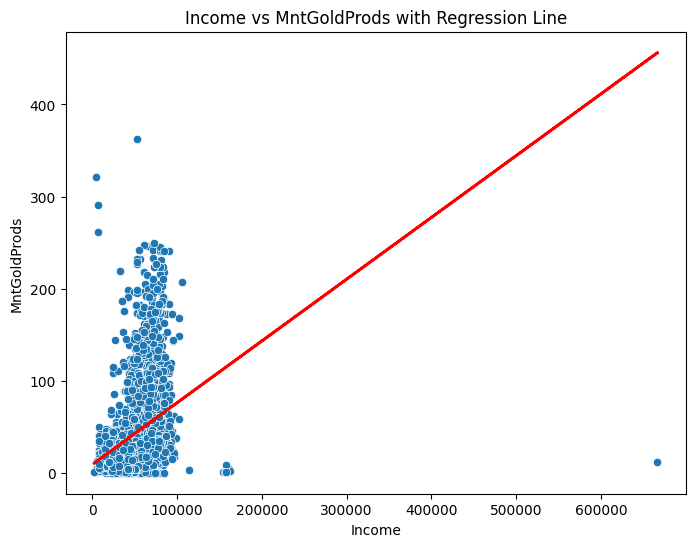

Regression results for MntFishProducts:
  Intercept: -12.347500504599282
  Slope: 0.0009545563764772547
  R-squared: 0.19



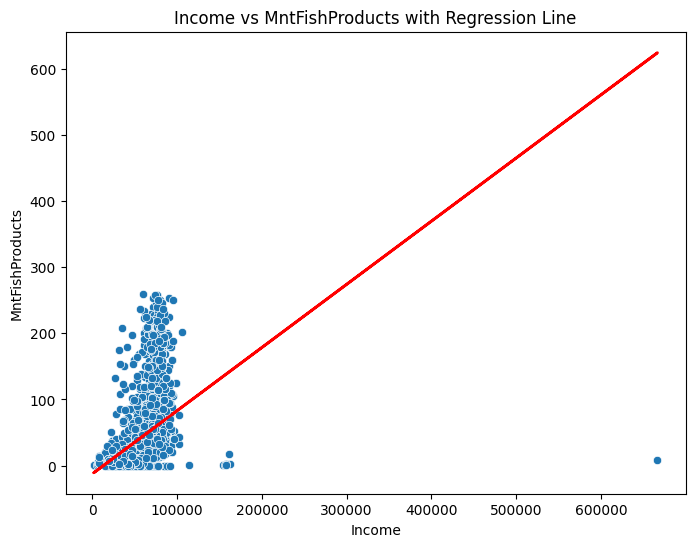

In [21]:
# Creating scatter plots to visualize the relationship between income and spending on each category.

plt.figure(figsize=(15, 10))

# Plotting Income vs MntWines
plt.subplot(2, 2, 1)
sns.scatterplot(data=sale, x='Income', y='MntWines')
plt.title('Income vs Amount Spent on Wines')

# Plotting Income vs MntMeatProducts
plt.subplot(2, 2, 2)
sns.scatterplot(data=sale, x='Income', y='MntMeatProducts')
plt.title('Income vs Amount Spent on Meat Products')

# Plotting Income vs MntGoldProds
plt.subplot(2, 2, 3)
sns.scatterplot(data=sale, x='Income', y='MntGoldProds')
plt.title('Income vs Amount Spent on Gold Products')

# Plotting Income vs MntFishProducts
plt.subplot(2, 2, 4)
sns.scatterplot(data=sale, x='Income', y='MntFishProducts')
plt.title('Income vs Amount Spent on Fish Products')

plt.tight_layout()
plt.show()

# Calculating the correlation between income and the amount spent on each category.

correlations = {
    'MntWines': sale['Income'].corr(sale['MntWines']),
    'MntMeatProducts': sale['Income'].corr(sale['MntMeatProducts']),
    'MntGoldProds': sale['Income'].corr(sale['MntGoldProds']),
    'MntFishProducts': sale['Income'].corr(sale['MntFishProducts'])
}

for key, value in correlations.items():
    print(f"Correlation between Income and {key}: {value:.2f}")

# Performing linear regression to understand the impact of income on spending.

from sklearn.linear_model import LinearRegression

def perform_regression(sale, x_column, y_column):
    X = sale[[x_column]]
    y = sale[y_column]

    model = LinearRegression()
    model.fit(X, y)

    r_squared = model.score(X, y)
    intercept = model.intercept_
    slope = model.coef_[0]

    print(f"Regression results for {y_column}:")
    print(f"  Intercept: {intercept}")
    print(f"  Slope: {slope}")
    print(f"  R-squared: {r_squared:.2f}")
    print()

    # Plotting the regression line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=sale, x=x_column, y=y_column)
    plt.plot(sale[x_column], model.predict(X), color='red', linewidth=2)
    plt.title(f'{x_column} vs {y_column} with Regression Line')
    plt.show()

perform_regression(sale, 'Income', 'MntWines')
perform_regression(sale, 'Income', 'MntMeatProducts')
perform_regression(sale, 'Income', 'MntGoldProds')
perform_regression(sale, 'Income', 'MntFishProducts')

**4. Can you test the hypothesis that recent customers complain less in general compared to older customers?**

In [22]:
from scipy.stats import chi2_contingency

# Preparing the data.

# Define a threshold to distinguish recent and older customers, e.g., the median date
threshold_date = sale['Dt_Customer'].median()

# Create a new column to distinguish recent and older customers
sale['Customer_Type'] = sale['Dt_Customer'].apply(lambda x: 'Recent' if x > threshold_date else 'Older')

# Calculating complaint rates
complaint_rates = sale.groupby('Customer_Type')['Complain'].mean()
print("Complaint Rates:")
print(complaint_rates)

# Using a chi-square test for proportions to compare the complaint rates statistically.

# Creating a contingency table
contingency_table = pd.crosstab(sale['Customer_Type'], sale['Complain'])

# Performing the Chi-Square test
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2}, P-Value: {p}")

# Interpreting the result
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Recent customers complain less compared to older customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in complaint rates between recent and older customers.")

Complaint Rates:
Customer_Type
Older     0.010714
Recent    0.008036
Name: Complain, dtype: float64

Chi-Square Statistic: 0.19227880426618596, P-Value: 0.6610267177005811
Fail to reject the null hypothesis: There is no significant difference in complaint rates between recent and older customers.


**5. Do people who accept the offer in the first campaign also accept in any other campaign?**

In [23]:
# Filtering the customers who accepted the first campaign
accepted_cmp1 = sale[sale['AcceptedCmp1'] == 1].copy()

# Checking if these customers also accepted any other campaigns
accepted_cmp1.loc[:, 'AcceptedOther'] = accepted_cmp1[['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].any(axis=1)

# Calculating the proportion of customers who accepted the first campaign and also accepted each of the other campaigns
proportion_cmp2 = accepted_cmp1['AcceptedCmp2'].mean()
proportion_cmp3 = accepted_cmp1['AcceptedCmp3'].mean()
proportion_cmp4 = accepted_cmp1['AcceptedCmp4'].mean()
proportion_cmp5 = accepted_cmp1['AcceptedCmp5'].mean()
proportion_cmp6 = accepted_cmp1['AcceptedCmp6'].mean()
proportion_any_other = accepted_cmp1['AcceptedOther'].mean()

print(f"Proportion of customers who accepted the first campaign and also accepted the second campaign: {proportion_cmp2:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the third campaign: {proportion_cmp3:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the fourth campaign: {proportion_cmp4:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the fifth campaign: {proportion_cmp5:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted the sixth campaign: {proportion_cmp6:.2f}")
print(f"Proportion of customers who accepted the first campaign and also accepted any other campaign: {proportion_any_other:.2f}")

Proportion of customers who accepted the first campaign and also accepted the second campaign: 0.09
Proportion of customers who accepted the first campaign and also accepted the third campaign: 0.17
Proportion of customers who accepted the first campaign and also accepted the fourth campaign: 0.33
Proportion of customers who accepted the first campaign and also accepted the fifth campaign: 0.47
Proportion of customers who accepted the first campaign and also accepted the sixth campaign: 0.55
Proportion of customers who accepted the first campaign and also accepted any other campaign: 0.73


**6. Profile of people who respond vs. who don’t.**

Summary Statistics for Numerical Attributes:
           Income                                                        \
            count          mean           std     min      25%      50%   
Responded                                                                 
False      1631.0  48720.626013  25401.392248  1730.0  33297.5  47353.0   
True        609.0  61692.121520  21355.097053  5648.0  45203.0  64504.0   

                             Year_Birth               ... Kidhome       \
               75%       max      count         mean  ...     75%  max   
Responded                                             ...                
False      63448.5  666666.0     1631.0  1969.034335  ...     1.0  2.0   
True       79593.0  105471.0      609.0  1968.193760  ...     1.0  2.0   

          Teenhome                                               
             count      mean       std  min  25%  50%  75%  max  
Responded                                                        
False     

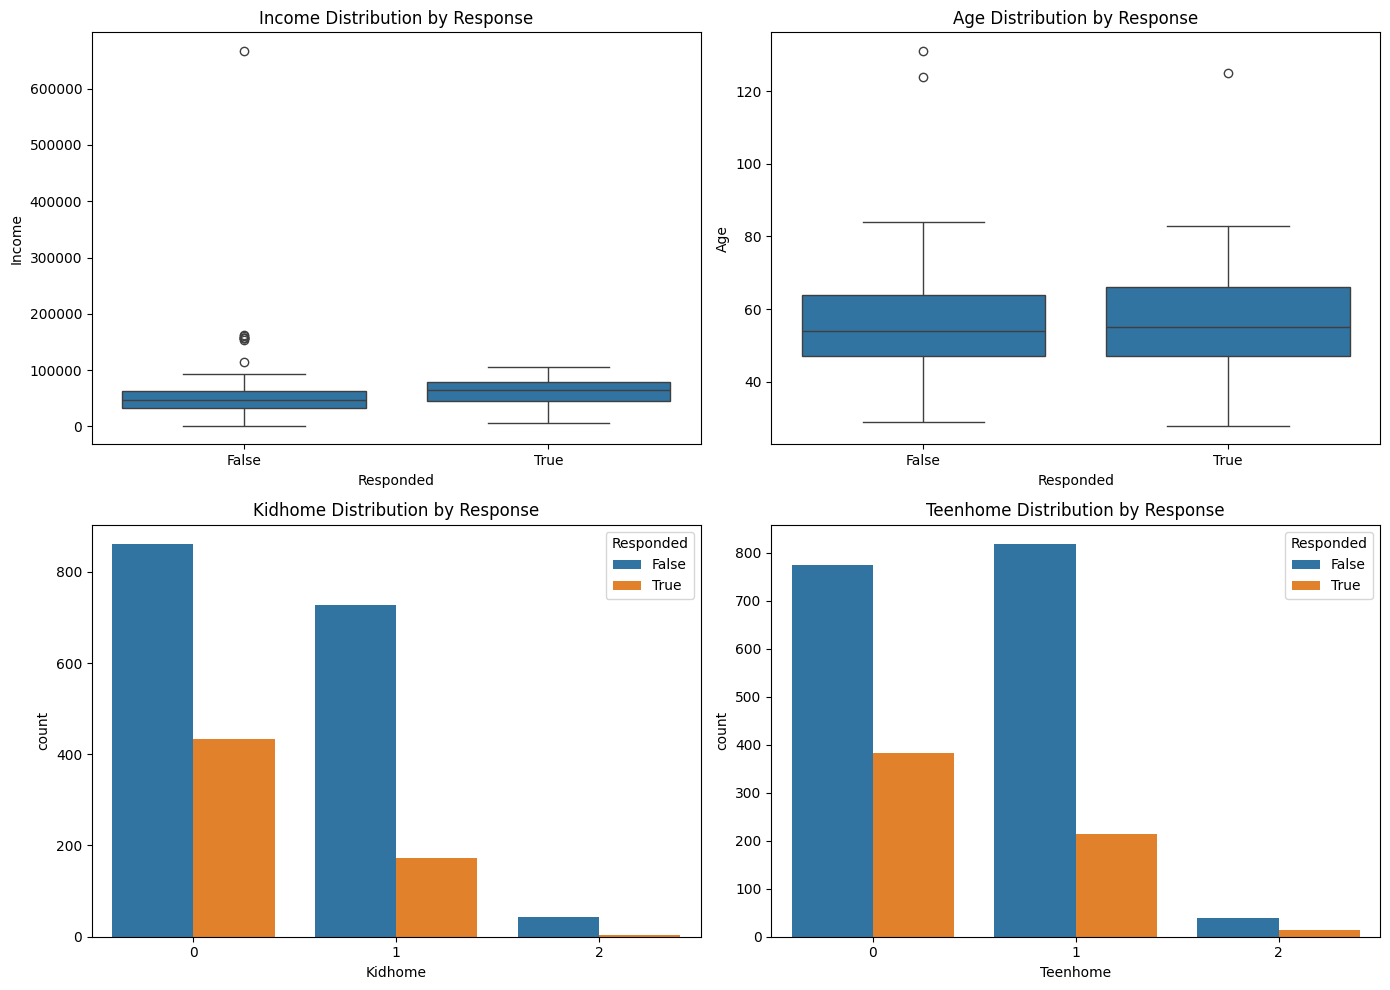

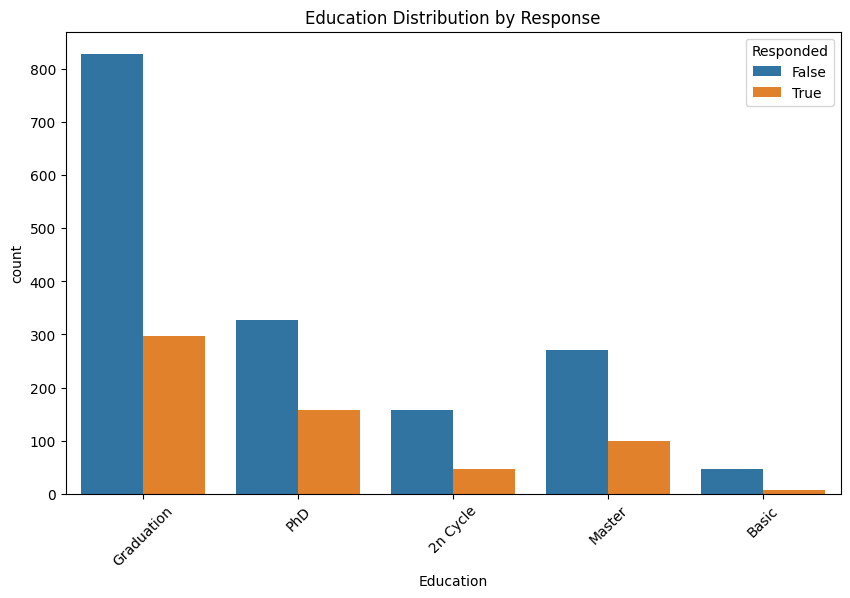

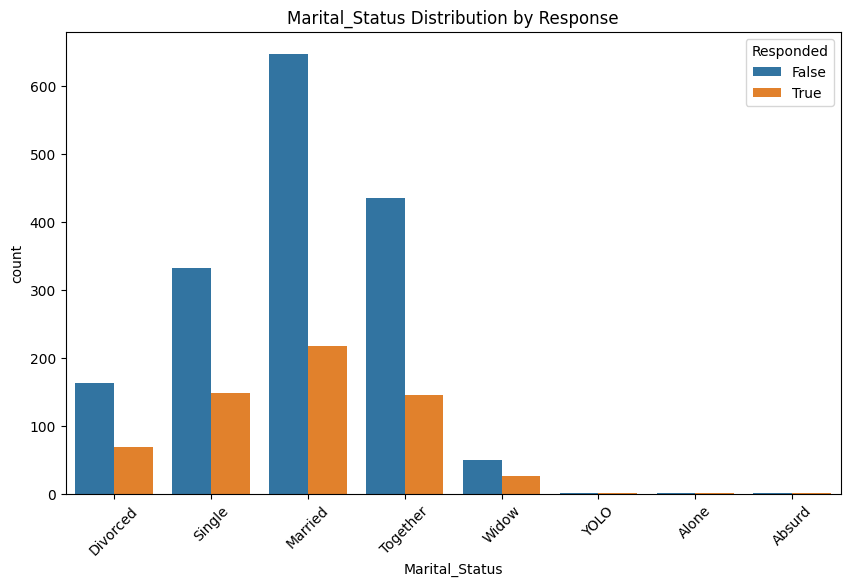

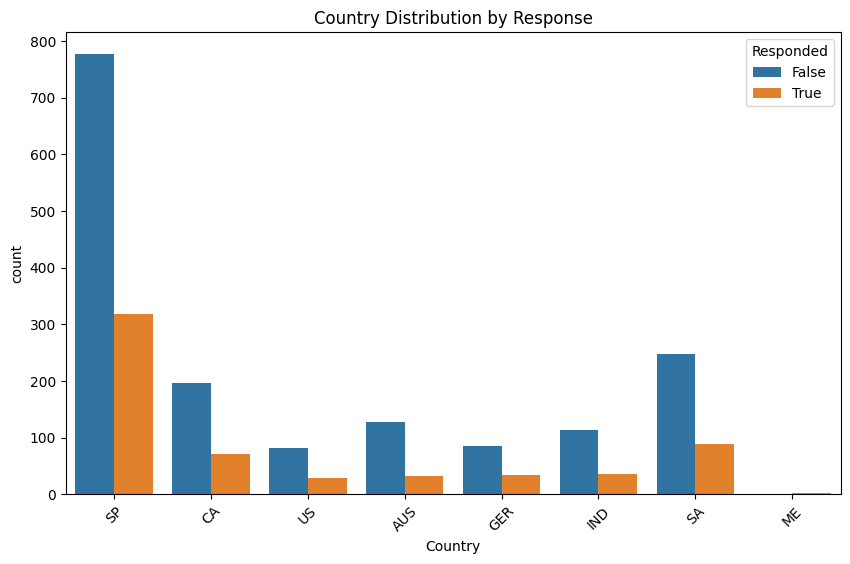

In [24]:
# Preparing the Data
sale['Responded'] = sale[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis=1) > 0

# Summarizing the Profiles

# Summary statistics for numerical attributes
numerical_attributes = ['Income', 'Year_Birth', 'Kidhome', 'Teenhome']
summary_stats = sale.groupby('Responded')[numerical_attributes].describe()
print("Summary Statistics for Numerical Attributes:")
print(summary_stats)

# Summary statistics for categorical attributes
categorical_attributes = ['Education', 'Marital_Status', 'Country']
categorical_stats = {attr: sale.groupby('Responded')[attr].value_counts(normalize=True) for attr in categorical_attributes}

for attr, stats in categorical_stats.items():
    print(f"\n{attr} Distribution by Response:")
    print(stats)

# Visualizing the Differences

# Setting up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plotting Income distribution
sns.boxplot(data=sale, x='Responded', y='Income', ax=axs[0, 0])
axs[0, 0].set_title('Income Distribution by Response')

# Plotting Age distribution
sale['Age'] = 2024 - sale['Year_Birth']
sns.boxplot(data=sale, x='Responded', y='Age', ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Response')

# Plotting Kidhome distribution
sns.countplot(data=sale, x='Kidhome', hue='Responded', ax=axs[1, 0])
axs[1, 0].set_title('Kidhome Distribution by Response')

# Plotting Teenhome distribution
sns.countplot(data=sale, x='Teenhome', hue='Responded', ax=axs[1, 1])
axs[1, 1].set_title('Teenhome Distribution by Response')

plt.tight_layout()
plt.show()

# Plotting categorical distributions
def plot_categorical_distribution(attribute):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=sale, x=attribute, hue='Responded')
    plt.title(f'{attribute} Distribution by Response')
    plt.xticks(rotation=45)
    plt.show()

plot_categorical_distribution('Education')
plot_categorical_distribution('Marital_Status')
plot_categorical_distribution('Country')

**Checking for Imbalance**

Responded
False    1631
True      609
Name: count, dtype: int64


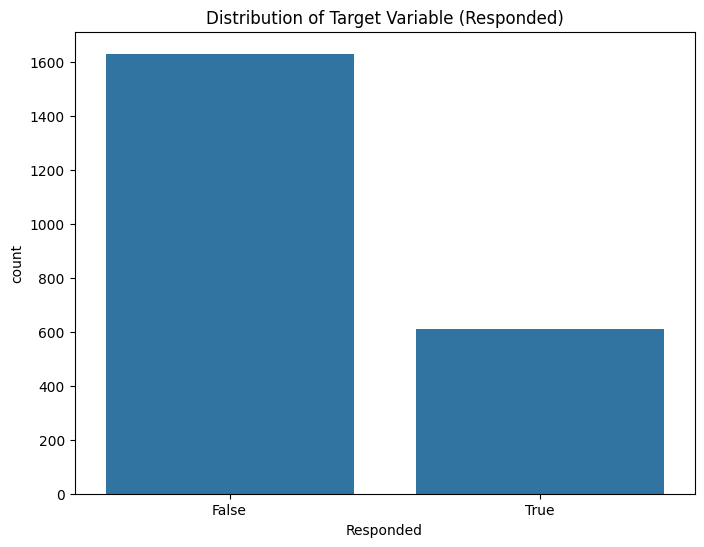

In [25]:
# Checking the distribution of the target variable
response_counts = sale['Responded'].value_counts()
print(response_counts)

# Visualizing the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=sale, x='Responded')
plt.title('Distribution of Target Variable (Responded)')
plt.show()

**Resampling & Model Training with Balanced Data**

In [26]:
from os.path import samefile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
for column in sale.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    sale[column] = le.fit_transform(sale[column])

# Ensuring numerical columns are of numeric types
numerical_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency']
sale[numerical_columns] = sale[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Filling any NaN values that might have been introduced by coercing
sale.fillna(sale.median(), inplace=True)

# Converting datetime columns to numerical representation (e.g., ordinal)
# Identify datetime columns
datetime_columns = sale.select_dtypes(include=['datetime']).columns
# Converting to ordinal
for column in datetime_columns:
    sale[column] = sale[column].apply(lambda x: x.toordinal() if pd.notnull(x) else x)

# Separating features and target
X = sale.drop(columns=['Responded'])
y = sale['Responded']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining resampling strategy
oversample = SMOTE()
undersample = RandomUnderSampler()

# Creating pipeline
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Applying resampling
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Checking the new distribution of the target variable
print(y_train_resampled.value_counts())

# Training and evaluating models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True)
}

# Training and evaluating models with resampled data
results_resampled = {}
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results_resampled[name] = {
        'Classification Report': classification_report(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

# Displaying results
for name, result in results_resampled.items():
    print(f"{name} (Resampled):\n")
    print(result['Classification Report'])
    print(f"ROC AUC: {result['ROC AUC']}\n")

# Displaying results and selecting the best model based on ROC AUC
best_model_name = max(results_resampled, key=lambda name: results_resampled[name]['ROC AUC'])
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")
print(results_resampled[best_model_name]['Classification Report'])
print(f"ROC AUC: {results_resampled[best_model_name]['ROC AUC']}")

Responded
False    1136
True     1136
Name: count, dtype: int64
Logistic Regression (Resampled):

              precision    recall  f1-score   support

       False       0.85      0.77      0.80       495
        True       0.48      0.62      0.54       177

    accuracy                           0.73       672
   macro avg       0.67      0.69      0.67       672
weighted avg       0.75      0.73      0.74       672

ROC AUC: 0.7660560406323118

Random Forest (Resampled):

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       495
        True       1.00      1.00      1.00       177

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672

ROC AUC: 1.0

Gradient Boosting (Resampled):

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       495
        True       1.00      1.00   

**Model Training and Model Evaluation**

In [27]:
# Training the best model on the balanced data
best_model.fit(X_train_resampled, y_train_resampled)

# Predicting and evaluating on the test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Printing classification report and ROC AUC score
print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba)}")

Best Model: Random Forest
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       495
        True       1.00      1.00      1.00       177

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672

ROC AUC: 1.0


**Hyperparameter Tuning**

In [28]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for the best model
param_grid = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    }
}

# Performing Grid Search for the best model
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid[best_model_name], cv=5, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters and retrain the model
best_params = grid_search.best_params_
best_model.set_params(**best_params)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluating the retrained model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba)}")

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       495
        True       1.00      1.00      1.00       177

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672

ROC AUC: 1.0


**Cross Validation**

In [29]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")

Cross-Validation ROC AUC Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean ROC AUC Score: 1.0


**Model Deployment**

In [31]:
'''
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

# Load the model from the file
loaded_model = joblib.load('best_model.pkl')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_new)
'''

"\nimport joblib\n\n# Save the best model to a file\njoblib.dump(best_model, 'best_model.pkl')\n\n# Load the model from the file\nloaded_model = joblib.load('best_model.pkl')\n\n# Use the loaded model to make predictions\npredictions = loaded_model.predict(X_new)\n"